In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


EX1: Generate a dataset drawn from two independent Gaussians, each of which
represents a class. You are free to select the number of desired datapoints,
the mean and variance of the two distributions.
•Flip randomly a percentage of the labels to introduce some noise and plot
the results.
Given the binary classification setting we are considering, a flip implies that a
point in class 0 will be assigned to class 1 and viceversa


In [4]:
np.random.seed(45678) # for reproducibility

def generate_data(means, sigmas, n):
    data = []
    labels = []

    for i in range(len(means)):
        data_class = np.random.multivariate_normal(means[i], sigmas[i], n)
        data.append(data_class)
        labels.append(np.full(n, i)) #crea un array di lunghezza n (che è il numero di campioni per classe) riempito con valore in posizione i-esima(etichetta della classe)

    data = np.vstack(data)
    labels = np.concatenate(labels) 
    return data, labels


def add_noise(labels, percentage):
    n_noisy = int(labels.size * percentage) #calcolo delle etichette da invertire. labels.size è il numero totale di etichette, percentage è la percentuale di etichette da invertire
    noisy_indices = np.random.choice(labels.size, n_noisy, replace=False) #
    labels[noisy_indices] = 1 - labels[noisy_indices]
    return labels


def plot_data(data, labels, title):
    plt.figure(figsize=(12, 8))
    plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='blue', label='Class 0') #prende gli elementi che sono 0 nella prima colonna, e poi prende gli elementi che sono 0 nella seconda colonna
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='red', label='Class 1') #prende gli elementi che sono 1 nella prima colonna, e poi prende gli elementi che sono 1 nella seconda colonna
    plt.plot()
    plt.title(title)


def plot_data_3d(data, labels, title):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    colors= ['red' if labels==1 else 'blue' for labels in labels]
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(30, 185)
    plt.title(title)
    plt.show()
    

In [5]:
#parametri

n=1000

means = [np.array([1, 1]), np.array([-5, -5])]
sigmas = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]])]

data, labels = generate_data(means, sigmas, n)

noisy_labels = add_noise(labels.copy(), percentage = 0.1)


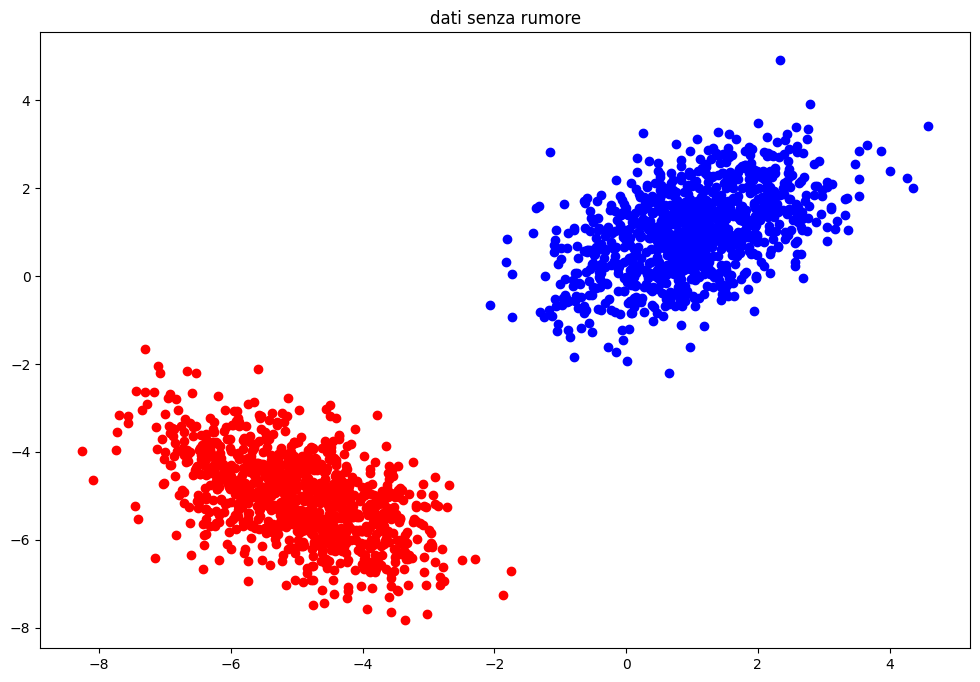

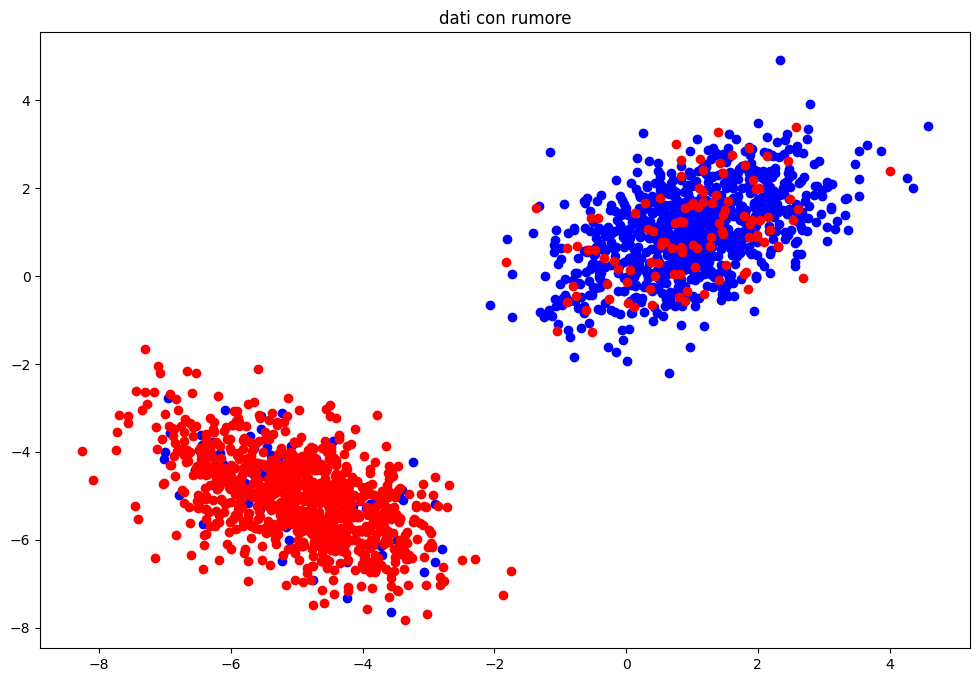

In [6]:

plot_data(data, labels, "dati senza rumore")

labels = add_noise(labels.copy(), percentage=0.1)

plot_data(data, labels, "dati con rumore")

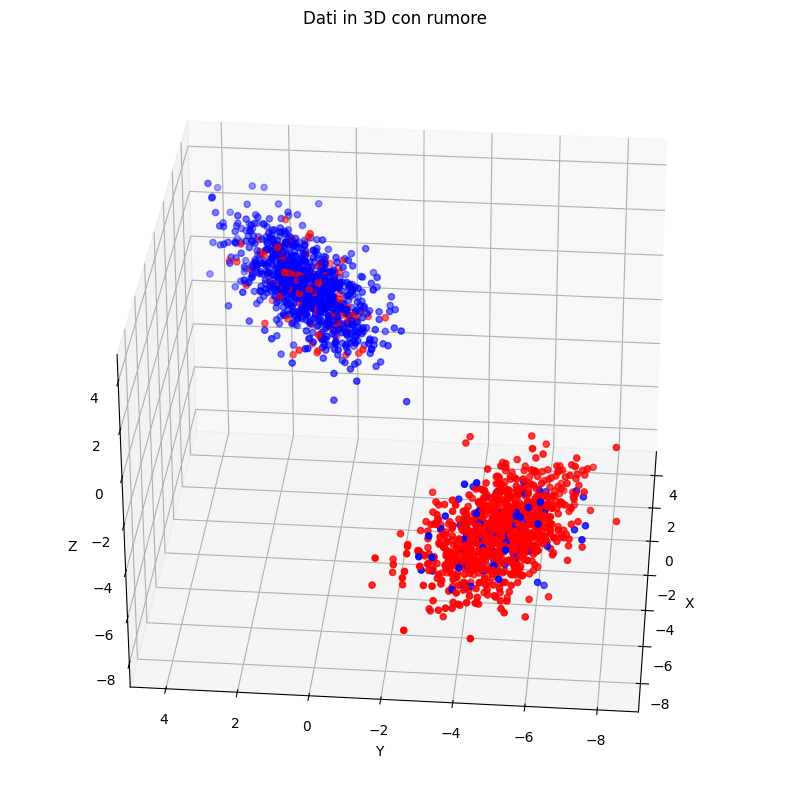

In [7]:
n=1000

means = [np.array([1, 1, 1]), np.array([-5, -5, -5])]
sigmas = [np.array([[1, 0.5, 0.3], [0.5, 1, 0.5], [0.3, 0.5, 1]]), np.array([[1, -0.5, 0.3], [-0.5, 1, -0.3], [0.3, -0.3, 1]])]

data, labels = generate_data(means, sigmas, n)

plot_data_3d(data, noisy_labels, "Dati in 3D con rumore")



EX 2


The Swiss Roll is defined by the following mapping:
x = φcos(φ) , y = φsin(φ) , z = ψ with φ ∈(1.5π,4.5π) and ψ ∈(0,10).

Create a dataset of n = 1000 points and plot them both in 2d and 3d.



In [9]:
def swiss_roll(n):
    data = np.zeros((n, 3))
    phi = np.random.uniform(1.5*np.pi, 4.5*np.pi, n)
    psi = np.random.uniform(0, 10, n)
    data[:,0]= phi * np.cos(phi) #coordinata x
    data[:,1] = phi * np.sin(phi) #coordinata y
    data[:,2] = psi #coordinata z
    return data


def plot_swiss_roll2d(data, title):
    fig=plt.figure(figsize=(12, 8))
    plt.scatter(data[:,0], data[:,1], c=data[:,0])
    plt.title(title)
    plt.show()

def plot_swiss_roll(data, title):
    fig = plt.figure(figsize=(12, 8))
    axes = fig.add_subplot(111)
    axes = plt.axes(projection='3d')
    axes.scatter(data[:,0], data[:,1], data[:,2], c=data[:,0])
    plt.title(title)
    plt.show()

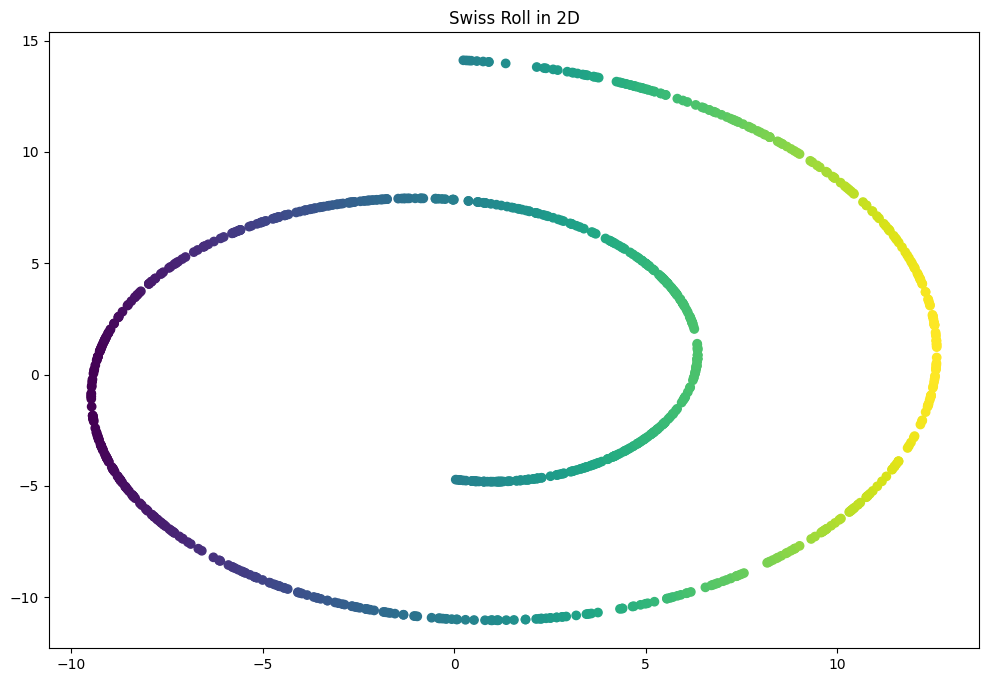

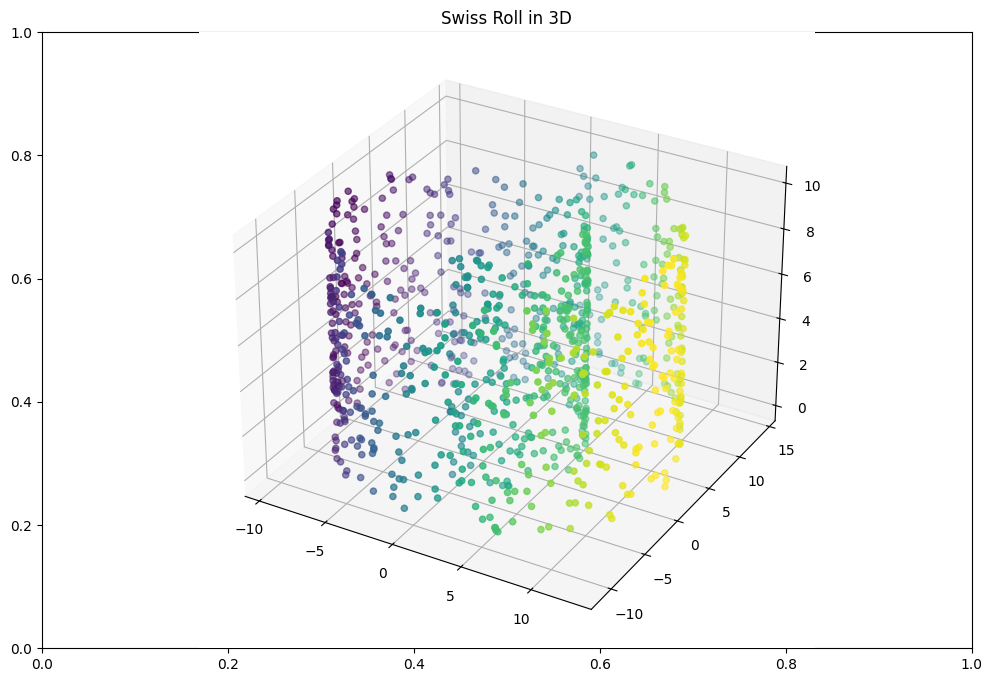

In [10]:
n= swiss_roll(1000)

plot_swiss_roll2d(swiss_roll(n), "Swiss Roll in 2D")
plot_swiss_roll(swiss_roll(n), "Swiss Roll in 3D")


Find the equation describing the Klein bottle problem. Generate a dataset and plot it as in Exercise 2.

In [12]:
def klein_bottle(n):
    data = np.zeros((n, 3))
    u = np.random.uniform(0, np.pi, n)
    v = np.random.uniform(0, 2*np.pi, n)
    data[:,0] = -2/15* np.cos(u) * 3 * np.cos(v) - 30 * np.sin(u) + 90 * np.cos(u)**4 * np.sin(u) - 60 * np.cos(u)**6 * np.sin(u) + 5*np.cos(u) * np.cos(v)* np.sin(u) #coordinata x
    data[:,1] = -1/15*np.sin(u)* 3 *np.cos(v) - 3*np.cos(u)**2 * np.cos(v)- 48 * np.cos(u)**4 * np.cos(v) + 48*np.cos(u)**6 * np.cos(v) - 60* np.sin(u) + 5*np.cos(u) * np.cos(v) * np.sin(u) - 80*np.cos(u)**5 * np.cos(v) * np.sin(u) + 80 * np.cos(u)**7*np.cos(v)*np.sin(u) #coordinata y
    data[:,2] = 2/15*(3+5*np.cos(u)*np.sin(u))*np.sin(v) #coordinata z
    return data


def plot_klein_bottle2d(data, title):
    fig=plt.figure(figsize=(12, 8))
    plt.scatter(data[:,0], data[:,1], c=data[:,0])
    #plt.set_xlabel('X') 
    #plt.set_ylabel('Y')
    plt.title(title)
    plt.show()

def plot_klein_bottle3d(data, title):
    fig=plt.figure(figsize=(12, 8))
    axes = fig.add_subplot(111)
    axes = plt.axes(projection='3d')
    axes.scatter(data[:,0], data[:,1], data[:,2], c=data[:,0], cmap='viridis')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    plt.title(title)
    plt.show()

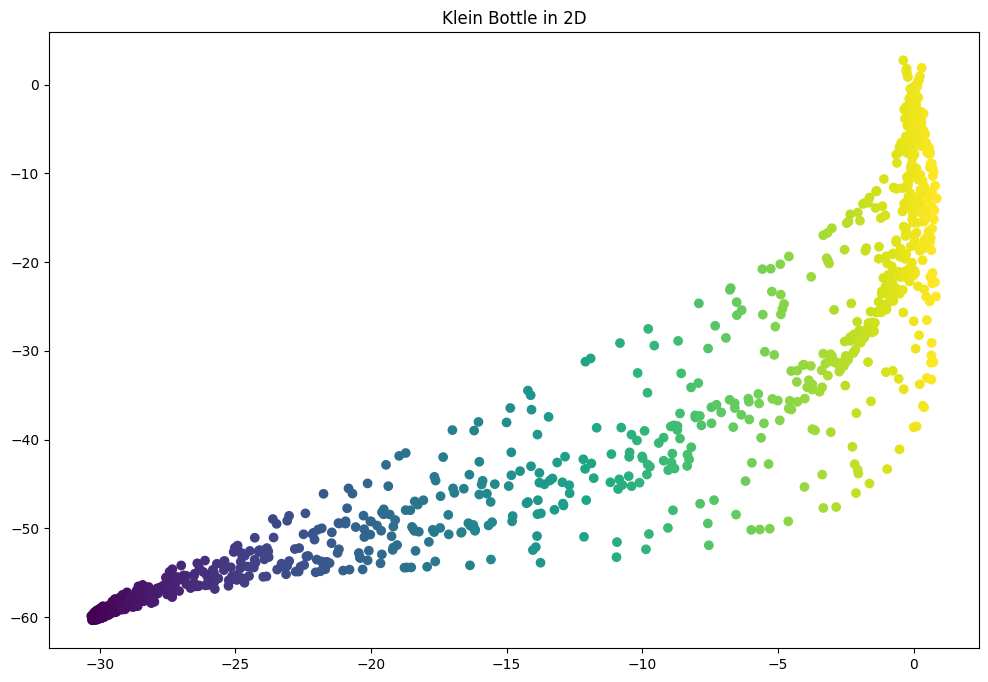

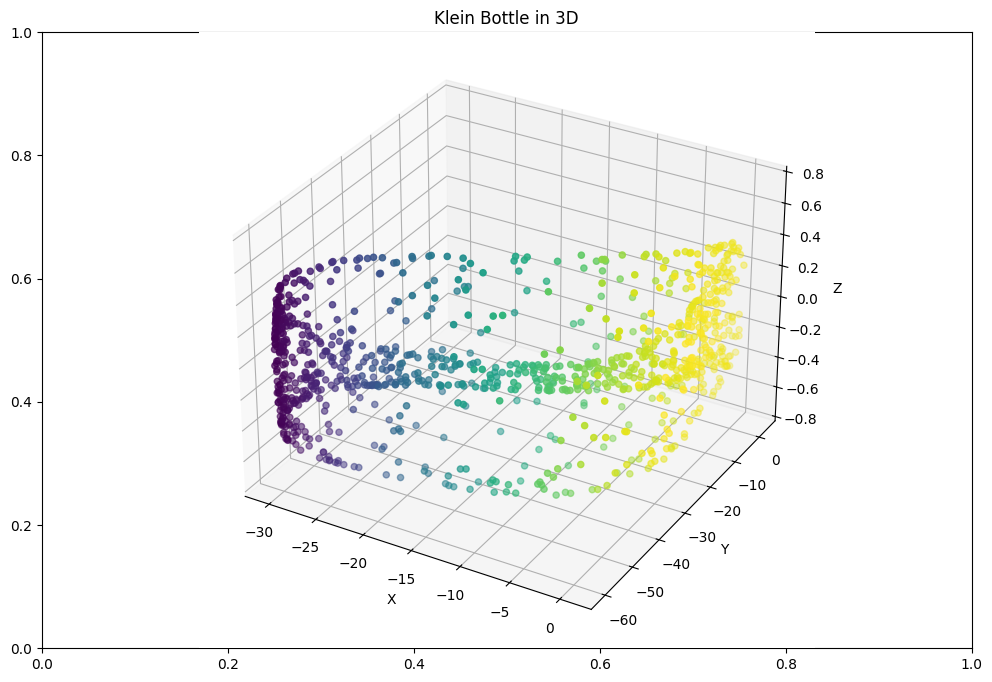

In [13]:
n = 1000

plot_klein_bottle2d(klein_bottle(n), "Klein Bottle in 2D")
plot_klein_bottle3d(klein_bottle(n), "Klein Bottle in 3D")
